In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df=pd.read_csv('car_evaluation.csv', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
column=['Price', 'Maintenance Cost', 'Number of Doors', 'Capacity', 'Size of Luggage Boot', 'safety', 'Decision']
df.columns=column

In [5]:
df.head()

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,safety,Decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Price                 1728 non-null   object
 1   Maintenance Cost      1728 non-null   object
 2   Number of Doors       1728 non-null   object
 3   Capacity              1728 non-null   object
 4   Size of Luggage Boot  1728 non-null   object
 5   safety                1728 non-null   object
 6   Decision              1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
df.describe()

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,safety,Decision
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,3,more,big,high,unacc
freq,432,432,432,576,576,576,1210


unacc    1210
acc       384
good       69
vgood      65
Name: Decision, dtype: int64

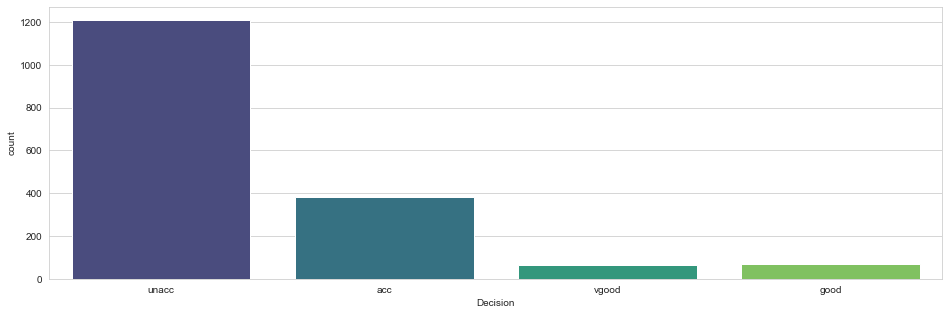

In [8]:
plt.figure(figsize=(16,5))
sns.countplot('Decision',data=df,palette='viridis')
df['Decision'].value_counts()

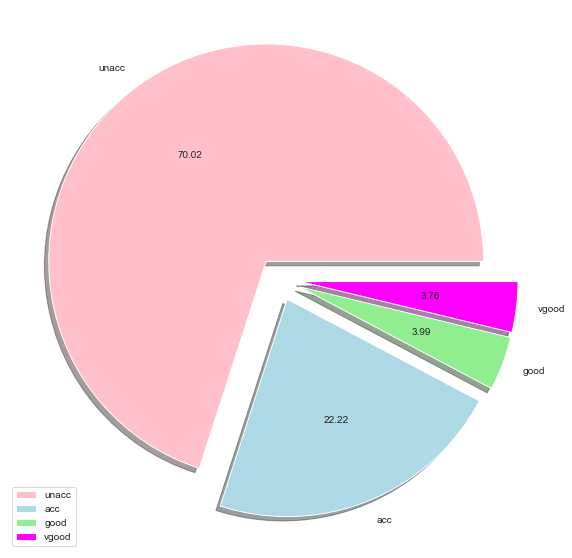

In [9]:
labels=['unacc','acc','good','vgood']
colors=['pink', 'lightblue', 'lightgreen', 'magenta']
size=[1210,384,69,65]
explode=[0.1,0.1,0.1,0.1]
plt.figure(figsize=(10,10))
plt.axis('off')
plt.pie(size,labels=labels,colors=colors,explode=explode,shadow=True,autopct='%.2f')
plt.legend()

In [10]:
df['Decision'].replace(('unacc','acc','good','vgood'),(0,0,1,1),inplace=True)

In [11]:
df['safety'].value_counts()

high    576
low     576
med     576
Name: safety, dtype: int64

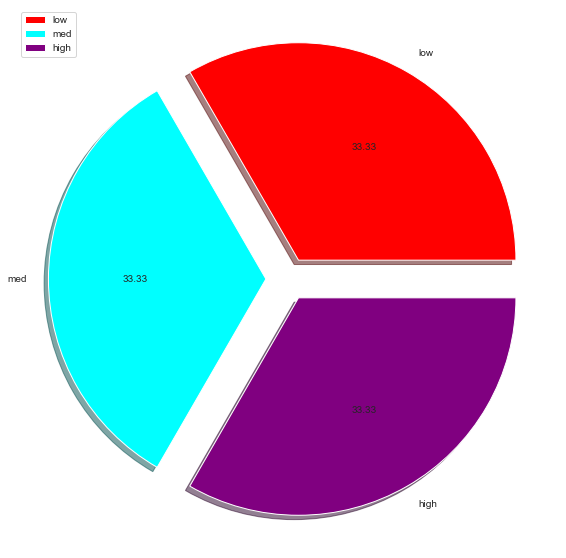

In [12]:
labels=['low','med','high']
colors=['red','cyan','purple']
size=[576,576,576]
explode=[0.1,0.1,0.1]
plt.figure(figsize=(10,10))
plt.axis('off')
plt.pie(size,labels=labels,colors=colors,explode=explode,shadow=True,autopct='%.2f')
plt.legend()

In [13]:
df['safety'].replace(('low','med','high'),(0,1,2),inplace=True)

In [14]:
df['Size of Luggage Boot'].value_counts()

big      576
small    576
med      576
Name: Size of Luggage Boot, dtype: int64

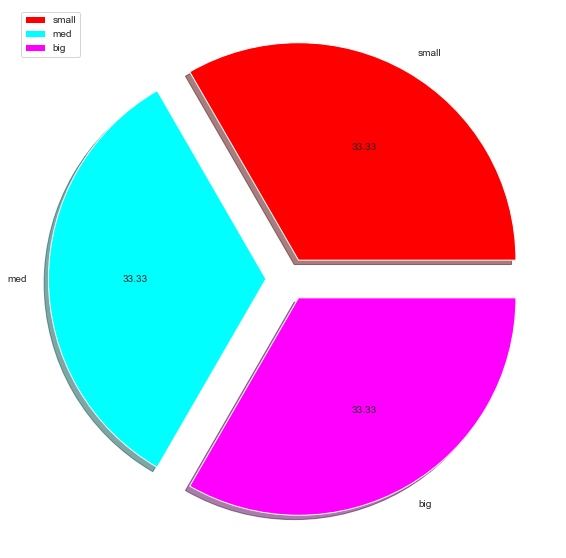

In [15]:
labels=['small', 'med', 'big']
colors=['red','cyan','magenta']
size=[576,576,576]
explode=[0.1,0.1,0.1]
plt.figure(figsize=(10,10))
plt.axis('off')
plt.pie(size,labels=labels,colors=colors,explode=explode,shadow=True,autopct='%.2f')
plt.legend()

In [16]:
df['Size of Luggage Boot'].replace(('small','med','big'),(0,1,2),inplace=True)

In [17]:
df['Capacity'].value_counts()

more    576
2       576
4       576
Name: Capacity, dtype: int64

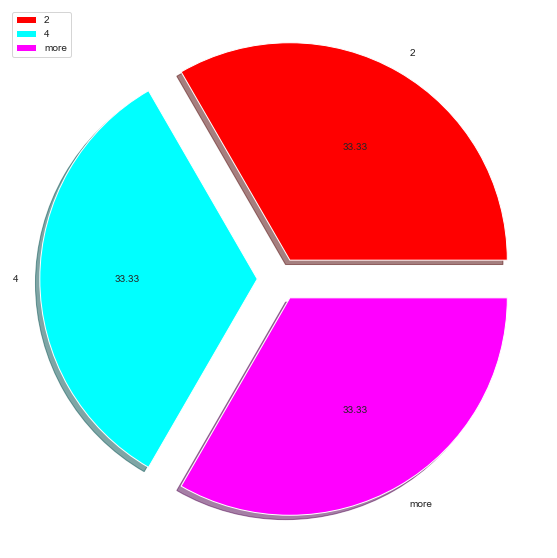

In [18]:
labels=['2', '4', 'more']
colors=['red','cyan','magenta']
size=[576,576,576]
explode=[0.1,0.1,0.1]
plt.figure(figsize=(10,10))
plt.axis('off')
plt.pie(size,labels=labels,colors=colors,explode=explode,shadow=True,autopct='%.2f')
plt.legend()

In [19]:
df['Capacity'].replace(('more'),5,inplace=True)

In [20]:
df['Number of Doors'].value_counts()

3        432
2        432
4        432
5more    432
Name: Number of Doors, dtype: int64

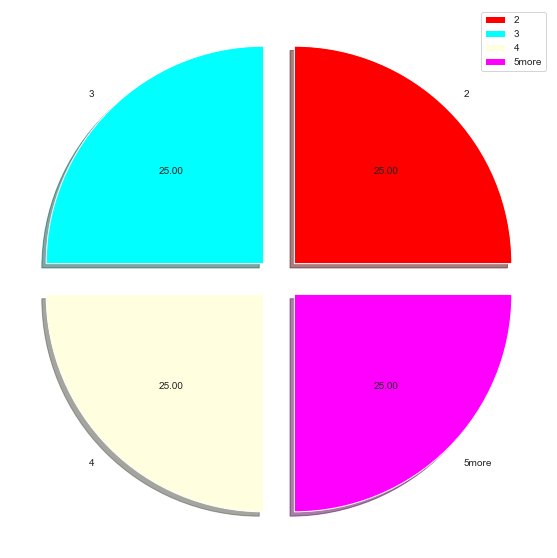

In [21]:
labels=['2','3','4','5more']
colors=['red','cyan','lightyellow','magenta']
size=[432,432,432,432]
explode=[0.1,0.1,0.1,0.1]
plt.figure(figsize=(10,10))
plt.axis('off')
plt.pie(size,labels=labels,colors=colors,explode=explode,shadow=True,autopct='%.2f')
plt.legend()

In [22]:
df['Number of Doors'].replace(('5more'),5,inplace=True)

In [23]:
df['Maintenance Cost'].value_counts()

vhigh    432
high     432
low      432
med      432
Name: Maintenance Cost, dtype: int64

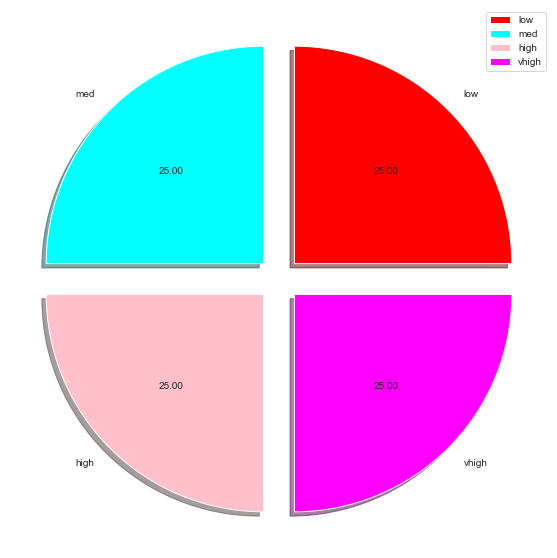

In [24]:
labels=['low','med','high','vhigh']
colors=['red','cyan','pink','magenta']
size=[432,432,432,432]
explode=[0.1,0.1,0.1,0.1]
plt.figure(figsize=(10,10))
plt.axis('off')
plt.pie(size,labels=labels,colors=colors,explode=explode,shadow=True,autopct='%.2f')
plt.legend()

In [25]:
df['Maintenance Cost'].replace(('low','med','high','vhigh'),(0,1,2,3),inplace=True)

In [26]:
df['Price'].value_counts()

vhigh    432
high     432
low      432
med      432
Name: Price, dtype: int64

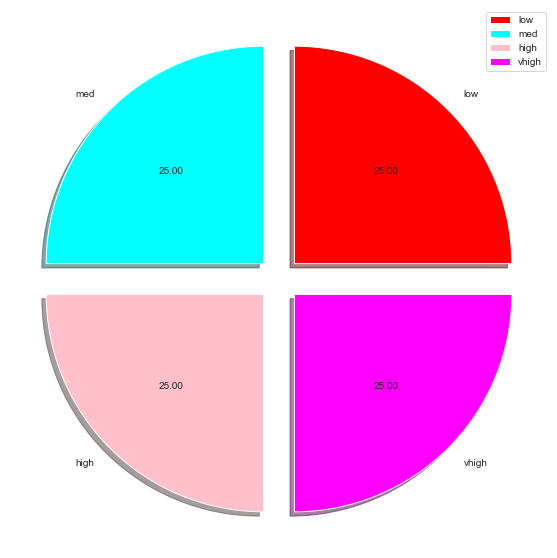

In [27]:
labels=['low','med','high','vhigh']
colors=['red','cyan','pink','magenta']
size=[432,432,432,432]
explode=[0.1,0.1,0.1,0.1]
plt.figure(figsize=(10,10))
plt.axis('off')
plt.pie(size,labels=labels,colors=colors,explode=explode,shadow=True,autopct='%.2f')
plt.legend()

In [28]:
df['Price'].replace(('low','med','high','vhigh'),(0,1,2,3),inplace=True)

In [29]:
df.head()

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,safety,Decision
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0


In [31]:
X=df.drop('Decision',axis=1)
y=df['Decision']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [33]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.9636992221261884
0.9737302977232924


In [35]:
prediction=lr.predict(X_test)

In [36]:
print(classification_report(y_test,prediction))
print('\n')
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       526
           1       0.89      0.76      0.82        45

    accuracy                           0.97       571
   macro avg       0.94      0.87      0.90       571
weighted avg       0.97      0.97      0.97       571



[[522   4]
 [ 11  34]]


In [37]:
acc_lr=accuracy_score(y_test,prediction)

In [38]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [39]:
prediction = knn.predict(X_test)

In [40]:
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

0.996542783059637
0.9807355516637478


In [41]:
print(confusion_matrix(y_test,prediction))

[[522   4]
 [  7  38]]


In [42]:
acc_knn=accuracy_score(y_test,prediction)

In [43]:
tree=DecisionTreeClassifier(max_depth=3)
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
prediction=tree.predict(X_test)

In [45]:
print(tree.score(X_train,y_train))
print(tree.score(X_test,y_test))

0.9325842696629213
0.9019264448336253


In [46]:
print(confusion_matrix(y_test,prediction))

[[495  31]
 [ 25  20]]


In [47]:
acc_dtr=accuracy_score(y_test,prediction)

In [48]:
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
prediction=rfc.predict(X_test)

In [50]:
print(rfc.score(X_train,y_train))
print(rfc.score(X_test,y_test))

1.0
0.978984238178634


In [51]:
print(confusion_matrix(y_test,prediction))

[[519   7]
 [  5  40]]


In [52]:
acc_rfc=accuracy_score(y_test,prediction)

In [53]:
feature_scores = pd.Series(rfc.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_scores

Price                   0.248638
Maintenance Cost        0.219739
safety                  0.203751
Capacity                0.174348
Size of Luggage Boot    0.098743
Number of Doors         0.054780
dtype: float64

Text(0, 0.5, 'Features')

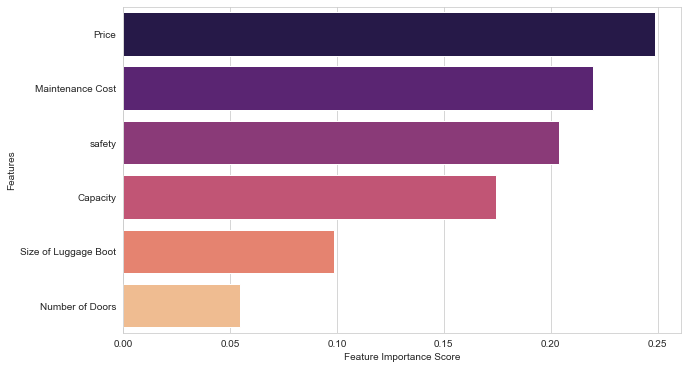

In [54]:
plt.figure(figsize=(10,6))
sns.barplot(x=feature_scores, y=feature_scores.index,palette='magma')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

In [56]:
models=pd.DataFrame({'Model':['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier'],
                     'Score':[acc_lr,acc_knn,acc_dtr,acc_rfc]})
models.sort_values(by='Score',ascending=False)

,Model,Score
1,KNeighborsClassifier,0.980736
3,RandomForestClassifier,0.978984
0,LogisticRegression,0.973730
2,DecisionTreeClassifier,0.901926
